In [1]:
from hypar_package import Stock
from hypar_package import Portfolio
from hypar_package import DataCollection
from hypar_package import Plotting
from hypar_package import Analysis

To gain access to the API, go to https://www.iexcloud.io to create an account. Then go to https://www.iexcloud.io/console/tokens to find your API token. Unless you want to get real data, it is recommended that you turn on "Viewing Test Data" along the left panel. Any API usage while this is on will not count towards your monthly API allowance. Note that your API token changes when this option is active.

Here is an arrow-digram outlining the Portfolio creation pipeline:

\begin{equation}
\text{User input} \rightarrow \text{IEX Cloud API} \rightarrow \text{bind data to Stock object} \rightarrow \text{Portfolio object containing Stocks (and data)}
\end{equation}

In [2]:
p = DataCollection.generate_portfolio()

Enter "stable" for real data and "sandbox" for test data: sandbox
Enter your IEX Cloud API key: Tpk_d8861bdb79aa4fd7ad9318566277b146
Symbols (separate with comma): NVDA, AMD, AAPL, WAL, MCD
Timeframe (max (15yr), 5y, 2y, 1y, ytd, 6m, 3m, 1m): 6m
Type the numbers corresponding to the data of interest (separate with comma): 
[1] price data
[2] balance sheet
[3] book data
[4] cash flow
[5] company data
[6] earnings
[7] income statement
[8] intraday data
[9] key stats
[10] price target
1


In [3]:
Analysis.spearman_corr_coeffs(p, 'close')

,NVDA,AMD,AAPL,WAL,MCD
NVDA,1.000000,0.983060,0.978543,0.969509,0.979673
AMD,0.983060,1.000000,0.963862,0.967250,0.971767
AAPL,0.978543,0.963862,1.000000,0.977414,0.980802
WAL,0.969509,0.967250,0.977414,1.000000,0.977414
MCD,0.979673,0.971767,0.980802,0.977414,1.000000


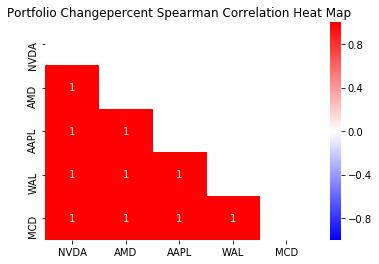

In [6]:
Plotting.spearman_corr_heatmap(p);

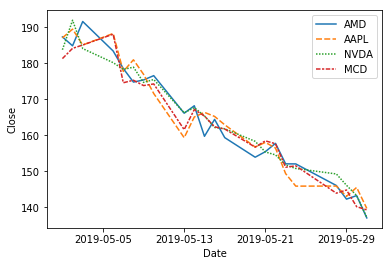

In [16]:
Plotting.timeseries(p, 'close', tickers=['AMD', 'AAPL', 'NVDA', 'MCD'])

In [20]:
Analysis.moments(p, 'AAPL', 'close')

{'mean': 164.43727272727276,
 'variance': 242.42633801652903,
 'skew': 0.13250009996683393,
 'kurtosis': -1.2130347273061877,
 'jarque bera': True}